# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты

import numpy as np

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

train_dataset = torchvision.datasets.CIFAR100(root='./data',
                                              train=True,
                                              download=True,
                                              transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR100(root='./data',
                                             train=False,
                                             download=True,
                                             transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=64, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=4,
                                          shuffle=False)

image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
19


In [3]:
3 * 32 * 32

3072

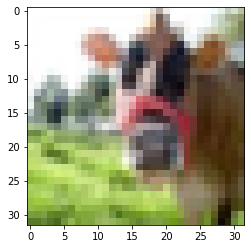

In [4]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [5]:
# Создайте собственную архитектуру!
# Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = torch.max(0.1 * x, 0.5 * x)
        x = self.fc4(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc5(x)
        #x = F.softmax(x)
        return x


net = Net(3072, 256, 100)

In [6]:
net

Net(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=100, bias=True)
)

In [7]:
# Запустить обучение (по аналогии с тем, что делали на паре)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.691


 10%|████████▎                                                                          | 1/10 [00:49<07:26, 49.66s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.691
[2,   601] loss: 0.691


 20%|████████████████▌                                                                  | 2/10 [01:43<06:57, 52.18s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.690
[3,   601] loss: 0.690


 30%|████████████████████████▉                                                          | 3/10 [02:39<06:16, 53.74s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.690
[4,   601] loss: 0.690


 40%|█████████████████████████████████▏                                                 | 4/10 [03:38<05:36, 56.01s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.690
[5,   601] loss: 0.690


 50%|█████████████████████████████████████████▌                                         | 5/10 [04:38<04:46, 57.35s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.689
[6,   601] loss: 0.689


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [05:38<03:52, 58.24s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.687
[7,   601] loss: 0.687


 70%|██████████████████████████████████████████████████████████                         | 7/10 [06:39<02:57, 59.07s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.684
[8,   601] loss: 0.680


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [07:38<01:58, 59.29s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.667
[9,   601] loss: 0.656


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [08:38<00:59, 59.35s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.645
[10,   601] loss: 0.638


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:38<00:00, 57.86s/it]

Training is finished!
